TODO
- Create pipeline that just samples some windows - for pretraining and not using the stims - don't want to bias them
- Temporal and spatial position embedding

In [1]:
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('default')
set_config(display="diagram")

In [2]:
from ecog_speech import datasets, experiments, plot_label_regions
from ecog_speech import visuals as viz
from ecog_speech.experiments import semi_supervised, transfer_learning

2022-10-01 14:51:22 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


*****

output cleared to make views cleaner

In [3]:
hvs_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-28')
in_data_map = datasets.HarvardSentences.load_data(*hvs_tuples[0])

2022-10-01 14:51:25,998 - ecog_speech.datasets.HarvardSentences.load_data:797 - INFO - -----------Subset: None------------
2022-10-01 14:51:25,999 - ecog_speech.datasets.HarvardSentences.load_data:798 - INFO - ---28-1-1-UCSD---
2022-10-01 14:51:25,999 - ecog_speech.datasets.HarvardSentences.make_filename:1284 - INFO - Harvard sentences only uses location and patient identifiers
2022-10-01 14:51:26,000 - ecog_speech.datasets.HarvardSentences.load_data:801 - DEBUG - Path : /export/Projects_GOLIATH/CMSCResearch/ECOGSpeech/ecog_speech/../data/HarvardSentences/UCSD/Data/UCSD28_Task_1.mat
2022-10-01 14:51:26,004 - ecog_speech.datasets.HarvardSentences.load_mat_from_path:766 - INFO - Couldn't load UCSD28_Task_1.mat with scipy (vers > 7.3?) - using package 'mat73' to load
2022-10-01 14:51:30,805 - ecog_speech.datasets.HarvardSentences.load_data:804 - DEBUG - Matlab keys : ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_common', 'label_contact_r_a_s', 'sEEG_signal', 's

****

In [6]:
hvs_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-28')
hvs = datasets.HarvardSentences(hvs_tuples, 
                                #pre_processing_pipeline='audio_gate_speaking_only', 
                                pre_processing_pipeline='region_classification',
                                flatten_sensors_to_samples=True,
                                extra_output_keys='sensor_ras_coord_arr')

2022-10-01 14:53:21,286 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:339 - DEBUG - preparing pipeline
2022-10-01 14:53:21,287 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:342 - DEBUG - Available pipelines: ['random_sample', 'random_sample_pinknoise', 'audio_gate', 'region_classification', 'region_classification_from_word_stim', 'audio_gate_speaking_only', 'word_classification', 'default']
2022-10-01 14:53:21,288 - ecog_speech.datasets.HarvardSentences.initialize:361 - INFO - 'region_classification' pipeline selected
2022-10-01 14:53:21,289 - ecog_speech.datasets.HarvardSentences.initialize:375 - INFO - Loading data directly


Loading data:   0%|          | 0/1 [00:00<?, ?it/s]

2022-10-01 14:53:21,300 - ecog_speech.datasets.HarvardSentences.load_data:797 - INFO - -----------Subset: Data------------
2022-10-01 14:53:21,300 - ecog_speech.datasets.HarvardSentences.load_data:798 - INFO - ---28-1-1-UCSD---
2022-10-01 14:53:21,300 - ecog_speech.datasets.HarvardSentences.make_filename:1284 - INFO - Harvard sentences only uses location and patient identifiers
2022-10-01 14:53:21,301 - ecog_speech.datasets.HarvardSentences.load_data:801 - DEBUG - Path : /export/Projects_GOLIATH/CMSCResearch/ECOGSpeech/ecog_speech/../data/HarvardSentences/UCSD/Data/UCSD28_Task_1.mat
2022-10-01 14:53:21,306 - ecog_speech.datasets.HarvardSentences.load_mat_from_path:766 - INFO - Couldn't load UCSD28_Task_1.mat with scipy (vers > 7.3?) - using package 'mat73' to load
2022-10-01 14:53:25,960 - ecog_speech.datasets.HarvardSentences.load_data:804 - DEBUG - Matlab keys : ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_common', 'label_contact_r_a_s', 'sEEG_signal', 's

Processing stim regions from 'speaking_region_stim':   0%|          | 0/50 [00:00<?, ?it/s]

2022-10-01 14:53:38,783 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:948 - INFO - Number of samples keys in sample index: {50000: 1}
2022-10-01 14:53:38,783 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:949 - INFO - Windows coded to (i.e. target value): 0
2022-10-01 14:53:38,784 - ecog_speech.pipeline.WindowSampleIndicesFromStim.transform:22 - DEBUG - Updated keys: {'n_samples_per_window', 'index_source_map', 'sample_index_map'}
2022-10-01 14:53:38,784 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:881 - INFO - (512, Timedelta('0 days 00:00:00.500000'))
2022-10-01 14:53:38,784 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:882 - INFO - Samples per window: 256


Processing stim regions from 'listening_region_stim':   0%|          | 0/50 [00:00<?, ?it/s]

2022-10-01 14:53:44,971 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:948 - INFO - Number of samples keys in sample index: {50000: 1}
2022-10-01 14:53:44,971 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:949 - INFO - Windows coded to (i.e. target value): 1
2022-10-01 14:53:44,971 - ecog_speech.pipeline.WindowSampleIndicesFromStim.transform:22 - DEBUG - Updated keys: {'n_samples_per_window', 'index_source_map', 'sample_index_map'}
2022-10-01 14:53:44,972 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:881 - INFO - (512, Timedelta('0 days 00:00:00.500000'))
2022-10-01 14:53:44,972 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:882 - INFO - Samples per window: 256


Processing stim regions from 'mouthing_region_stim':   0%|          | 0/50 [00:00<?, ?it/s]

2022-10-01 14:53:51,282 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:948 - INFO - Number of samples keys in sample index: {50000: 1}
2022-10-01 14:53:51,283 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:949 - INFO - Windows coded to (i.e. target value): 2
2022-10-01 14:53:51,283 - ecog_speech.pipeline.WindowSampleIndicesFromStim.transform:22 - DEBUG - Updated keys: {'n_samples_per_window', 'index_source_map', 'sample_index_map'}
2022-10-01 14:53:51,283 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:881 - INFO - (512, Timedelta('0 days 00:00:00.500000'))
2022-10-01 14:53:51,284 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:882 - INFO - Samples per window: 256


Processing stim regions from 'imagining_region_stim':   0%|          | 0/50 [00:00<?, ?it/s]

2022-10-01 14:53:57,683 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:948 - INFO - Number of samples keys in sample index: {50000: 1}
2022-10-01 14:53:57,683 - ecog_speech.pipeline.WindowSampleIndicesFromStim.process:949 - INFO - Windows coded to (i.e. target value): 3
2022-10-01 14:53:57,683 - ecog_speech.pipeline.WindowSampleIndicesFromStim.transform:22 - DEBUG - Updated keys: {'n_samples_per_window', 'index_source_map', 'sample_index_map'}
2022-10-01 14:53:57,684 - ecog_speech.datasets.HarvardSentences.initialize:405 - INFO - N samples per window: 256
2022-10-01 14:53:57,684 - ecog_speech.datasets.HarvardSentences.initialize:426 - INFO - GOOD AND BAD SENSORS: {('UCSD', 28, 1, 1): ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,

Applying sensor selection:   0%|          | 0/1 [00:00<?, ?it/s]

2022-10-01 14:54:23,521 - ecog_speech.pipeline.ApplySensorSelection.process:143 - INFO - Selection of columns passed to sensor selection
2022-10-01 14:54:23,591 - ecog_speech.pipeline.ApplySensorSelection.process:168 - INFO - Selecting columns in RAS coordinate data
2022-10-01 14:54:23,592 - ecog_speech.pipeline.ApplySensorSelection.transform:22 - DEBUG - Updated keys: {'signal', 'selected_columns', 'sensor_ras_df', 'bad_columns', 'bad_sensor_method', 'sensor_ras_coord_arr'}


In [7]:
data_map = hvs.data_maps[hvs_tuples[0]]

In [8]:
[k for k in data_map.keys() if 'stim' in k]

['stimcode',
 'stim',
 'speaking_word_stim',
 'speaking_word_stim_mask',
 'listening_word_stim',
 'listening_word_stim_mask',
 'mouthing_word_stim',
 'mouthing_word_stim_mask',
 'imagining_word_stim',
 'imagining_word_stim_mask',
 'speaking_region_stim',
 'speaking_region_stim_mask',
 'listening_region_stim',
 'listening_region_stim_mask',
 'mouthing_region_stim',
 'mouthing_region_stim_mask',
 'imagining_region_stim',
 'imagining_region_stim_mask']

In [9]:
hvs[0].keys()

dict_keys(['signal_arr', 'sensor_ras_coord_arr', 'target_arr'])

In [10]:
dl = hvs.to_dataloader(num_workers=4, batch_size=128, batches_per_epoch=10)

batch_d = next(iter(dl))

In [11]:
batch_d.keys()

dict_keys(['signal_arr', 'sensor_ras_coord_arr', 'target_arr'])

***
Plot scratch
- check if words codes are in the start_stop_time dataframe with the new pipeline

In [12]:
data_map = hvs.data_maps[hvs_tuples[0]]

In [13]:
data_map.keys()

dict_keys(['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_common', 'label_contact_r_a_s', 'sEEG_signal', 'start_stop_word_ms', 'stimcode', 'signal', 'stim', 'sensor_ras_df', 'sensor_ras_coord_arr', 'audio_mel_spec', 'good_sensor_columns', 'bad_sensor_columns', 'word_start_stop_times', 'sent_start_stop_time', 'speaking_word_stim', 'speaking_word_stim_mask', 'listening_word_stim', 'listening_word_stim_mask', 'mouthing_word_stim', 'mouthing_word_stim_mask', 'imagining_word_stim', 'imagining_word_stim_mask', 'speaking_region_stim', 'speaking_region_stim_mask', 'listening_region_stim', 'listening_region_stim_mask', 'mouthing_region_stim', 'mouthing_region_stim_mask', 'imagining_region_stim', 'imagining_region_stim_mask', 'sample_index_map', 'n_samples_per_window', 'index_source_map', 'selected_columns', 'bad_columns', 'bad_sensor_method'])

In [14]:
wsst_df = data_map['word_start_stop_times']

In [15]:
wsst_df.head()

,start_t,stop_t,word,stim_sentcode,stim_sentcode_t,stim,speaking_word_length_t,time_from_speaking_start,trial_start_t,trial_stop_t,...,mouthing_region_start_t,mouthing_region_stop_t,listening_word_start_t,listening_word_stop_t,speaking_word_start_t,speaking_word_stop_t,mouthing_word_start_t,mouthing_word_stop_t,imagining_word_start_t,imagining_word_stop_t
stim_start_t,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:17.529073200,0 days 00:00:17.529073200,0 days 00:00:18.397100400,on,5.0,0 days 00:00:17.496093750,51.0,0 days 00:00:00.868027200,0 days 00:00:00,0 days 00:00:13.562500,0 days 00:00:29.628906250,...,0 days 00:00:21.537109375,0 days 00:00:25.537109375,0 days 00:00:13.562500,0 days 00:00:14.430527200,0 days 00:00:17.517578125,0 days 00:00:18.385605325,0 days 00:00:21.537109375,0 days 00:00:22.405136575,0 days 00:00:25.558593750,0 days 00:00:26.426620950
0 days 00:00:18.397100400,0 days 00:00:18.397100400,0 days 00:00:18.816148,RICE,5.0,0 days 00:00:17.496093750,51.0,0 days 00:00:00.419047600,0 days 00:00:00.868027200,0 days 00:00:13.562500,0 days 00:00:29.628906250,...,0 days 00:00:21.537109375,0 days 00:00:25.537109375,0 days 00:00:14.430527200,0 days 00:00:14.849574800,0 days 00:00:18.385605325,0 days 00:00:18.804652925,0 days 00:00:22.405136575,0 days 00:00:22.824184175,0 days 00:00:26.426620950,0 days 00:00:26.845668550
0 days 00:00:18.816148,0 days 00:00:18.816148,0 days 00:00:18.995739900,IS,5.0,0 days 00:00:17.496093750,51.0,0 days 00:00:00.179591900,0 days 00:00:01.287074800,0 days 00:00:13.562500,0 days 00:00:29.628906250,...,0 days 00:00:21.537109375,0 days 00:00:25.537109375,0 days 00:00:14.849574800,0 days 00:00:15.029166700,0 days 00:00:18.804652925,0 days 00:00:18.984244825,0 days 00:00:22.824184175,0 days 00:00:23.003776075,0 days 00:00:26.845668550,0 days 00:00:27.025260450
0 days 00:00:18.995739900,0 days 00:00:18.995739900,0 days 00:00:19.514560700,OFTEN,5.0,0 days 00:00:17.496093750,51.0,0 days 00:00:00.518820800,0 days 00:00:01.466666700,0 days 00:00:13.562500,0 days 00:00:29.628906250,...,0 days 00:00:21.537109375,0 days 00:00:25.537109375,0 days 00:00:15.029166700,0 days 00:00:15.547987500,0 days 00:00:18.984244825,0 days 00:00:19.503065625,0 days 00:00:23.003776075,0 days 00:00:23.522596875,0 days 00:00:27.025260450,0 days 00:00:27.544081250
0 days 00:00:19.514560700,0 days 00:00:19.514560700,0 days 00:00:20.113200200,SERVED,5.0,0 days 00:00:17.496093750,51.0,0 days 00:00:00.598639500,0 days 00:00:01.985487500,0 days 00:00:13.562500,0 days 00:00:29.628906250,...,0 days 00:00:21.537109375,0 days 00:00:25.537109375,0 days 00:00:15.547987500,0 days 00:00:16.146627,0 days 00:00:19.503065625,0 days 00:00:20.101705125,0 days 00:00:23.522596875,0 days 00:00:24.121236375,0 days 00:00:27.544081250,0 days 00:00:28.142720750


In [23]:
wsst_df.columns

Index(['start_t', 'stop_t', 'word', 'stim_sentcode', 'stim_sentcode_t', 'stim',
       'speaking_word_length_t', 'time_from_speaking_start', 'trial_start_t',
       'trial_stop_t', 'listening_region_start_t', 'listening_region_stop_t',
       'speaking_region_start_t', 'speaking_region_stop_t',
       'imagining_region_start_t', 'imagining_region_stop_t',
       'mouthing_region_start_t', 'mouthing_region_stop_t',
       'listening_word_start_t', 'listening_word_stop_t',
       'speaking_word_start_t', 'speaking_word_stop_t',
       'mouthing_word_start_t', 'mouthing_word_stop_t',
       'imagining_word_start_t', 'imagining_word_stop_t'],
      dtype='object')

In [17]:
wsst_df.word.value_counts(dropna=False).sort_index()

A           8
ACROSS      1
AND         9
APART       1
AT          2
         ... 
WRIST       1
YOU         1
YOUNG       2
YOUR        1
on        161
Name: word, Length: 248, dtype: int64

In [18]:
hvs.selected_flat_keys[0][0]

0

In [21]:
data_map['word_start_stop_times'].pipe(lambda o: o.set_index('word_code').drop(0).word.to_dict())[9]

KeyError: '[0] not found in axis'

In [22]:
data_map['word_stim']#.value_counts()

KeyError: 'word_stim'

In [24]:
hvs.sample_plot(0)

ValueError: too many values to unpack (expected 2)

In [20]:
hvs.sample_plot(500)

ValueError: too many values to unpack (expected 2)

***

output cleared to make views cleaner

In [25]:
hvs_cv_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-22')
hvs_cv = datasets.HarvardSentences(hvs_cv_tuples, pre_processing_pipeline='audio_gate_speaking_only', flatten_sensors_to_samples=True,
                                   extra_output_keys='sensor_ras_coord_arr')

2022-10-01 14:59:59,018 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:339 - DEBUG - preparing pipeline
2022-10-01 14:59:59,019 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:342 - DEBUG - Available pipelines: ['random_sample', 'random_sample_pinknoise', 'audio_gate', 'region_classification', 'region_classification_from_word_stim', 'audio_gate_speaking_only', 'word_classification', 'default']
2022-10-01 14:59:59,019 - ecog_speech.datasets.HarvardSentences.initialize:361 - INFO - 'audio_gate_speaking_only' pipeline selected
2022-10-01 14:59:59,020 - ecog_speech.datasets.HarvardSentences.initialize:375 - INFO - Loading data directly


Loading data:   0%|          | 0/1 [00:00<?, ?it/s]

2022-10-01 14:59:59,032 - ecog_speech.datasets.HarvardSentences.load_data:797 - INFO - -----------Subset: Data------------
2022-10-01 14:59:59,032 - ecog_speech.datasets.HarvardSentences.load_data:798 - INFO - ---22-1-1-UCSD---
2022-10-01 14:59:59,032 - ecog_speech.datasets.HarvardSentences.make_filename:1284 - INFO - Harvard sentences only uses location and patient identifiers
2022-10-01 14:59:59,032 - ecog_speech.datasets.HarvardSentences.load_data:801 - DEBUG - Path : /export/Projects_GOLIATH/CMSCResearch/ECOGSpeech/ecog_speech/../data/HarvardSentences/UCSD/Data/UCSD22_Task_1.mat
2022-10-01 14:59:59,054 - ecog_speech.datasets.HarvardSentences.load_mat_from_path:766 - INFO - Couldn't load UCSD22_Task_1.mat with scipy (vers > 7.3?) - using package 'mat73' to load
2022-10-01 15:00:05,376 - ecog_speech.datasets.HarvardSentences.load_data:804 - DEBUG - Matlab keys : ['EEG_signal', 'EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_common', 'label_contact_r_a_s', 'sE

Applying sensor selection:   0%|          | 0/1 [00:00<?, ?it/s]

2022-10-01 15:01:19,841 - ecog_speech.pipeline.ApplySensorSelection.process:143 - INFO - Selection of columns passed to sensor selection
2022-10-01 15:01:20,174 - ecog_speech.pipeline.ApplySensorSelection.process:168 - INFO - Selecting columns in RAS coordinate data
2022-10-01 15:01:20,175 - ecog_speech.pipeline.ApplySensorSelection.transform:22 - DEBUG - Updated keys: {'signal', 'selected_columns', 'sensor_ras_df', 'bad_columns', 'bad_sensor_method', 'sensor_ras_coord_arr'}


In [26]:
p = hvs_cv.make_pipeline_map()['default']

In [27]:
hvs_cv.pipeline_map['default']

Pipeline(steps=[('parse_signal',
                 ParseTimeSeriesArrToFrame(array_key='sEEG_signal', default_fs=1200, fs_key='fs_signal', output_key='signal')),
                ('parse_audio',
                 ParseTimeSeriesArrToFrame(array_key='audio', default_fs=48000, fs_key='fs_audio', reshape=-1)),
                ('parse_stim',
                 ParseTimeSeriesArrToFrame(array_key='stimcode', default_fs=1200, fs_key='fs_signal', output_k...
                 PowerThreshold(silence_quantile_threshold=0.05, silence_window_samples=72000, speaking_quantile_threshold=0.85, speaking_window_samples=3000, stim_key='speaking_region_stim_mask')),
                ('speaking_indices',
                 WindowSampleIndicesFromIndex(index_shift=Timedelta('-1 days +23:59:59.750000'), sample_n=10000, stim_key='stim_pwrt', stim_value_remap=1)),
                ('silence_indices',
                 WindowSampleIndicesFromIndex(index_shift=Timedelta('-1 days +23:59:59.750000'), sample_n=10000, stim_key='silence_stim_pwrt_s', stim_value_remap=0)),
                ('output', 'passthrough')])

In [28]:
hvs_cv.pipeline_map['audio_gate_speaking_only']

Pipeline(steps=[('parse_signal',
                 ParseTimeSeriesArrToFrame(array_key='sEEG_signal', default_fs=1200, fs_key='fs_signal', output_key='signal')),
                ('parse_audio',
                 ParseTimeSeriesArrToFrame(array_key='audio', default_fs=48000, fs_key='fs_audio', reshape=-1)),
                ('parse_stim',
                 ParseTimeSeriesArrToFrame(array_key='stimcode', default_fs=1200, fs_key='fs_signal', output_k...
                 PowerThreshold(silence_quantile_threshold=0.05, silence_window_samples=72000, speaking_quantile_threshold=0.85, speaking_window_samples=3000, stim_key='speaking_region_stim_mask')),
                ('speaking_indices',
                 WindowSampleIndicesFromIndex(index_shift=Timedelta('-1 days +23:59:59.750000'), sample_n=10000, stim_key='stim_pwrt', stim_value_remap=1)),
                ('output', 'passthrough')])

In [29]:
hvs_cv.extra_output_keys

'sensor_ras_coord_arr'

In [30]:
hvs_cv[0].keys()

dict_keys(['signal_arr', 'sensor_ras_coord_arr', 'target_arr'])

In [31]:
cv_dl = hvs_cv.to_dataloader(num_workers=4, batch_size=128)

cv_batch_d = next(iter(dl))

In [32]:
batch_d.keys()

dict_keys(['signal_arr', 'sensor_ras_coord_arr', 'target_arr'])

****

In [52]:
from ecog_speech.models import base_transformers

cog2vec = base_transformers.CoG2Vec((1, 256), feature_model=None, context_model=None, projection_model=None, 
                                    #feature_extractor_layers='[(128, 7, 3)] + [(128, 3, 2)] * 2 + [(128, 3, 1)]',
                                    feature_extractor_layers='[(128, 7, 2)] + [(64, 3, 2)] * 2 + [(32, 3, 2)] * 2',
                                    negatives_from_everywhere=True, feature_grad_mult=.1,
                                    n_negatives=50, codebook_negatives=25, cross_sample_negatives=25,
                                    #n_negatives=50, codebook_negatives=25, cross_sample_negatives=25,
                                    mask_length=4,
                                    # adjust this (and perhaps quant_num_groups) to tweak t
                                    # the complexity of underlying encoding
                                    quant_num_vars=50, quant_num_groups=2
                                   )
init_mask_embed = cog2vec.mask_embedding.detach().cpu().clone()
cog2vec.t_feat_o.shape

Feature extractor output shape: torch.Size([16, 32, 6])


torch.Size([16, 32, 6])

In [53]:
C, T = cog2vec.C, cog2vec.T

In [163]:
viz_mask = base_transformers._compute_mask_indices((5, T), padding_mask=None, mask_prob=0.3, mask_length=2, min_masks=1)

In [165]:
T

6

Text(0.5, 0, 'Temporal Dimension')

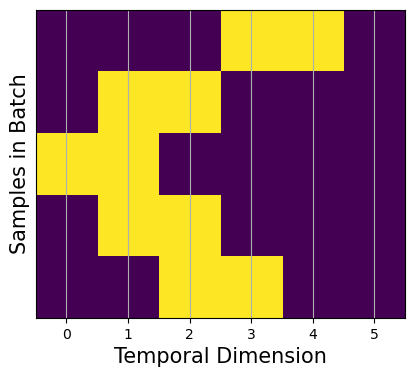

In [164]:
import matplotlib
from matplotlib import pyplot as plt
fig, ax = plt.subplots( figsize=(10, 4))
ax.imshow(viz_mask.cpu().detach().numpy())
ax.set_yticks([])
ax.set_xticks(range(0, 6))
ax.grid(True, which='both')

ax.set_ylabel('Samples in Batch', fontsize=15)
ax.set_xlabel('Temporal Dimension', fontsize=15)
#ax.ann('foo')

****

In [10]:
from ecog_speech.models import base_transformers

trainer = base_transformers.Cog2VecTrainer(model_map=dict(model=cog2vec), opt_map=dict(),
                                           train_data_gen=dl, #cv_data_gen=cv_dl, 
                                           lr_adjust_on_cv_loss=True,
                                           lr_adjust_on_plateau_kws=dict(verbose=True, patience=5),
                                           learning_rate=0.0001)
# These are just static attrs - may make them ctor params
trainer.squeeze_first=False # Need to remove the channel dim when using fairseq wave2vec2 feature extractor

# Current thinking:
#   The codebook will collapse and return all the same values unless the loss is competative and the code is
#   not too big. So weight code book usage high
trainer.ppl_weight = 100

In [11]:
res = trainer.train(5)

Training epoch:   0%|          | 0/5 [00:00<?, ?it/s]

-loss-:   0%|                 | 0/10 [00:00<?, ?it/s]

-loss-:   0%|                 | 0/10 [00:00<?, ?it/s]

-loss-:   0%|                 | 0/10 [00:00<?, ?it/s]

-loss-:   0%|                 | 0/10 [00:00<?, ?it/s]

-loss-:   0%|                 | 0/10 [00:00<?, ?it/s]

losses and results 

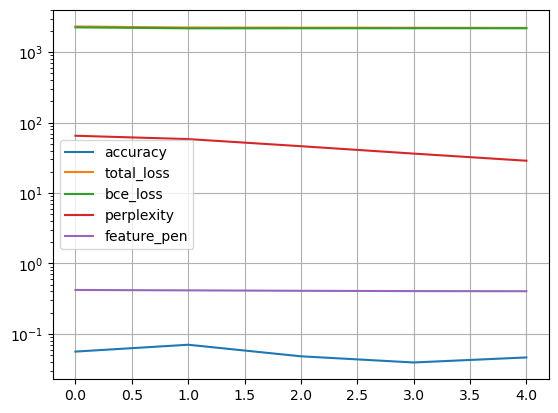

In [12]:
res_df = pd.DataFrame(res).T
ax = res_df.plot(logy=True, grid=True)

In [13]:
res_df

,accuracy,total_loss,bce_loss,perplexity,feature_pen
0,0.056055,2321.950269,2256.362378,65.167421,0.420420
1,0.070117,2244.282349,2185.422900,58.444308,0.415131
2,0.048047,2236.309204,2189.607178,46.292835,0.409139
3,0.039258,2228.999194,2192.254517,36.339466,0.405208
4,0.046289,2217.942212,2188.746631,28.792036,0.403525


acc is on training data

In [ ]:
res_df[['total_loss', 'cv_loss', 'acc']].plot(secondary_y='acc')

### dist of change in mask embedding elements

In [ ]:
mask_embed = cog2vec.mask_embedding.detach().cpu().clone()

ax = pd.Series((init_mask_embed - mask_embed).detach().cpu()).hist()

***

### Run on all data, not just speaking

In [14]:
hvs_all_tuples = datasets.HarvardSentences.make_tuples_from_sets_str('UCSD-28')

hvs_all = datasets.HarvardSentences(hvs_all_tuples, pre_processing_pipeline='audio_gate',
                                   flatten_sensors_to_samples=True,
                                extra_output_keys='sensor_ras_coord_arr'
                                   )

2022-07-02 22:00:49,822 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:336 - DEBUG - preparing pipeline
2022-07-02 22:00:49,835 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:339 - DEBUG - Available pipelines: ['audio_gate', 'region_classification', 'region_classification_from_word_stim', 'audio_gate_speaking_only', 'default']
2022-07-02 22:00:49,836 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:347 - INFO - 'audio_gate' pipeline selected
2022-07-02 22:00:49,836 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:361 - INFO - Loading data directly


Loading data:   0%|          | 0/1 [00:00<?, ?it/s]

2022-07-02 22:00:49,854 - ecog_speech.datasets.HarvardSentences.load_data:777 - INFO - ---28-1-1-UCSD---
2022-07-02 22:00:49,854 - ecog_speech.datasets.HarvardSentences.load_data:778 - INFO - |--->Using Subset: Data
2022-07-02 22:00:49,855 - ecog_speech.datasets.HarvardSentences.make_filename:1233 - INFO - Harvard sentences only uses location and patient identifiers
2022-07-02 22:00:49,855 - ecog_speech.datasets.HarvardSentences.load_data:781 - DEBUG - Path : /home/morgan/Projects/CMSCResearch/ECOGSpeech/ecog_speech/../data/HarvardSentences/UCSD/Data/UCSD28_Task_1.mat
2022-07-02 22:00:49,953 - ecog_speech.datasets.HarvardSentences.load_mat_from_path:746 - INFO - Couldn't load UCSD28_Task_1.mat with scipy (vers > 7.3?) - using package 'mat73' to load
2022-07-02 22:01:07,841 - ecog_speech.datasets.HarvardSentences.load_data:784 - DEBUG - Matlab keys : ['EKG_signal', 'Labels', 'audio', 'fs_audio', 'fs_signal', 'label_contact_common', 'label_contact_r_a_s', 'sEEG_signal', 'start_stop_word_

Processing stim regions:   0%|          | 0/47 [00:00<?, ?it/s]

2022-07-02 22:02:59,434 - ecog_speech.pipeline.WindowSampleIndicesFromStim.make_sample_indices:1152 - INFO - Number of samples keys in sample index: {300: 47}
2022-07-02 22:02:59,434 - ecog_speech.pipeline.WindowSampleIndicesFromStim.transform:22 - DEBUG - Updated keys: {'index_source_map', 'n_samples_per_window', 'sample_index_map'}
2022-07-02 22:03:04,930 - ecog_speech.pipeline.WindowSampleIndicesFromIndex.transform:22 - DEBUG - Updated keys: {'n_samples_per_window', 'sample_index_map'}
2022-07-02 22:03:04,931 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:396 - INFO - N samples per window: 256
2022-07-02 22:03:04,931 - ecog_speech.datasets.HarvardSentences.__attrs_post_init__:416 - INFO - GOOD AND BAD SENSORS: {('UCSD', 28, 1, 1): ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,

Applying sensor selection:   0%|          | 0/1 [00:00<?, ?it/s]

2022-07-02 22:03:30,808 - ecog_speech.pipeline.ApplySensorSelection.process:142 - INFO - Selection of columns passed to sensor selection
2022-07-02 22:03:31,456 - ecog_speech.pipeline.ApplySensorSelection.process:167 - INFO - Selecting columns in RAS coordinate data
2022-07-02 22:03:31,458 - ecog_speech.pipeline.ApplySensorSelection.transform:22 - DEBUG - Updated keys: {'selected_columns', 'bad_sensor_method', 'sensor_ras_df', 'bad_columns', 'sensor_ras_coord_arr', 'signal'}


In [ ]:
# Take best model instead of last model
#cog2vec.load_state_dict(trainer.best_model_state)

In [15]:
batch_d.keys()

dict_keys(['signal_arr', 'sensor_ras_coord_arr', 'target_arr'])

In [16]:
batch_d['signal_arr'].shape

torch.Size([128, 1, 256])

In [20]:
batch_d.keys()

dict_keys(['signal_arr', 'sensor_ras_coord_arr', 'target_arr'])

In [19]:
m.forward(batch_d)

{'x': tensor([[[-0.9804,  0.1127, -0.6559,  ..., -0.5955, -0.2850,  0.2457],
          [-0.9856,  0.1389, -0.6478,  ..., -0.5903, -0.2853,  0.2539],
          [-0.9868,  0.1340, -0.6624,  ..., -0.5961, -0.2825,  0.2645],
          [-0.9876,  0.1277, -0.6708,  ..., -0.5916, -0.2884,  0.2568]],
 
         [[-0.6012, -0.0689, -0.2017,  ..., -0.1944,  0.1670,  0.2711],
          [-0.6041, -0.0801, -0.2279,  ..., -0.1857,  0.1678,  0.2531],
          [-0.5961, -0.0819, -0.2146,  ..., -0.1817,  0.1641,  0.2561],
          [-0.5959, -0.0928, -0.2122,  ..., -0.1783,  0.1759,  0.2435]],
 
         [[-0.9938,  0.1242, -0.6819,  ..., -0.5908, -0.3001,  0.2652],
          [-1.0003,  0.1182, -0.6824,  ..., -0.5939, -0.2840,  0.2623],
          [-0.9952,  0.1265, -0.6773,  ..., -0.5957, -0.2857,  0.2638],
          [-1.0056,  0.1230, -0.6859,  ..., -0.5925, -0.2883,  0.2606]],
 
         ...,
 
         [[ 0.6033, -0.2626,  0.2865,  ...,  0.5287,  0.4201,  0.2437],
          [ 0.6082, -0.2710,  0.27

In [29]:
from tqdm.auto import tqdm
import torch

results_l = list()

#cog2vec.eval()
m = cog2vec.to(trainer.device).eval()
#_dl = cv_dl
_dl = hvs_all.to_dataloader(num_workers=4, batch_size=256)
#sens_id = 10
for batch_d in tqdm(_dl, desc="Batching"):
    #X_barr = batch_d['signal_arr'].to(trainer.device)
    # Select a single sensor for now and remove the singleton dimension
    #sens_id = np.random.randint(0, X_barr.shape[1])
    
    #X = X_barr.select(1, sens_id).unsqueeze(1)

    with torch.no_grad():
        feat_d = m.forward(batch_d, features_only=True, mask=False)
        results_l.append(
            dict(signal_arr=batch_d['signal_arr'],
                 target_arr=batch_d['target_arr'],
                 #signal_arr=batch_d['signal_arr'].detach().cpu().numpy(),
                **{n:arr.detach().cpu().numpy() for n, arr in feat_d.items()}))

Batching:   0%|          | 0/20715 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9f1f284310>
Traceback (most recent call last):
  File "/home/morgan/.conda/envs/venv_research/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/home/morgan/.conda/envs/venv_research/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/home/morgan/.conda/envs/venv_research/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9f1f284310>
Traceback (most recent call last):
  File "/home/morgan/.conda/envs/venv_research/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()Exception ignored in: <function _Multi

KeyboardInterrupt: 

Shapes of each batch output

In [30]:
{k: a.shape for k, a in results_l[0].items()}

{'signal_arr': torch.Size([256, 1, 256]),
 'target_arr': torch.Size([256, 1]),
 'x': (256, 18, 128),
 'features': (256, 18, 128)}

Concat into arrays and load into pandas objects

In [39]:
all_x = np.concatenate([r['x'] for r in results_l])
all_x_df = pd.DataFrame(all_x.reshape(all_x.shape[0], -1))

all_feats = np.concatenate([r['features'] for r in results_l])
all_feats_df = pd.DataFrame(all_feats.reshape(all_feats.shape[0], -1))

# If there was a target
all_y = np.concatenate([r['target_arr'] for r in results_l])
all_y_s = pd.Series(all_y.squeeze(), name='target_val')

### inspect outputs
- x are the data from context model
- features are data from feature extraction model (conv)

In [33]:
%%time
all_x_df.describe()

CPU times: user 3.07 s, sys: 0 ns, total: 3.07 s
Wall time: 3.07 s


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,...,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,-0.479185,-0.115014,-0.263100,0.347260,-0.036701,0.665098,0.771628,0.035955,-0.217945,-1.541625,...,1.022215,0.008866,-0.100898,0.221274,-1.086501,-0.084912,0.222425,0.575184,-0.499534,1.098970
std,0.346889,1.602428,0.157944,0.359068,0.325324,0.369263,0.174835,0.773029,0.122478,1.354553,...,0.272323,0.550396,0.529903,0.535759,0.302170,0.168782,0.421841,1.358370,0.295342,0.669866
min,-1.078949,-2.203747,-0.735588,-0.266217,-0.652266,0.063489,0.471968,-1.002485,-0.502738,-3.004821,...,0.481093,-0.918609,-0.836385,-0.487682,-1.703248,-0.670286,-0.411187,-1.481032,-1.032064,0.063779
25%,-0.726661,-1.785953,-0.389468,-0.018830,-0.299862,0.264445,0.623795,-0.803340,-0.317629,-2.798187,...,0.934160,-0.591181,-0.691724,-0.309593,-1.340740,-0.209133,-0.251238,-0.931508,-0.821578,0.354779
50%,-0.655455,-0.360997,-0.224103,0.310194,-0.178781,0.703138,0.744016,-0.051098,-0.262154,-2.211086,...,1.057053,0.365308,-0.072605,0.038674,-1.094486,-0.034137,0.346529,1.082882,-0.354718,1.332679
75%,-0.132421,1.728733,-0.144222,0.747137,0.346981,1.042273,0.909175,0.917033,-0.130705,-0.086369,...,1.209773,0.442636,0.478944,0.833848,-0.893261,0.056453,0.655778,1.915891,-0.267637,1.693762
max,0.259776,2.038259,-0.001406,1.052722,0.526300,1.286232,1.293574,1.160072,0.159552,0.636299,...,1.699427,0.792790,0.709145,1.018336,-0.533509,0.239973,0.743607,2.195361,0.160558,2.016001


Correlate features with speaking/not-speaking

In [40]:
corr_speak_df = all_x_df.corrwith(all_y_s)

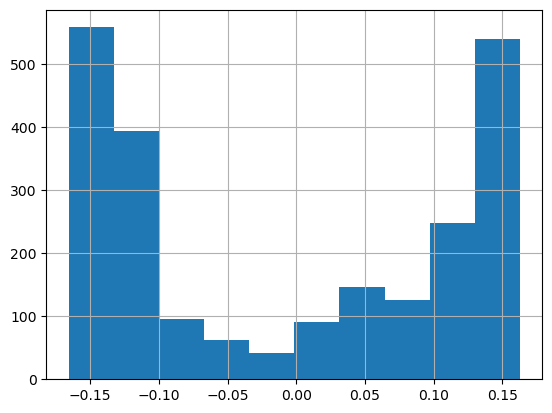

In [41]:
ax = corr_speak_df.hist()

In [42]:
def pca_and_plot(_df):

    from sklearn.decomposition import PCA

    _pca_arr = PCA(2).fit_transform(_df)

    _pca_df = pd.DataFrame(_pca_arr)
    
    ax = _pca_df.plot.scatter(x=0, y=1, alpha=0.3, c=all_y_s, cmap='tab10', sharex=False)
    fig = ax.get_figure()
    fig.patch.set_facecolor('white')
    return _pca_df, fig, ax

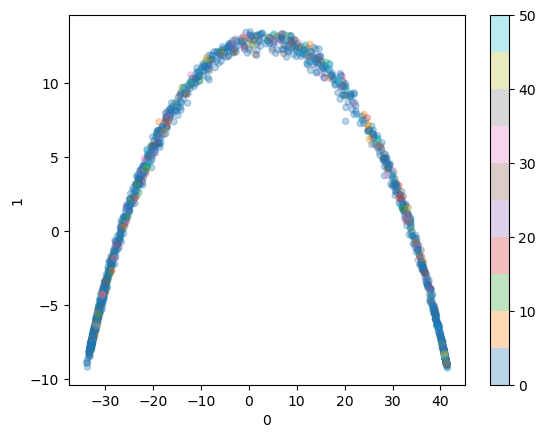

In [43]:
_pca_df, fig, axs = pca_and_plot(all_x_df)

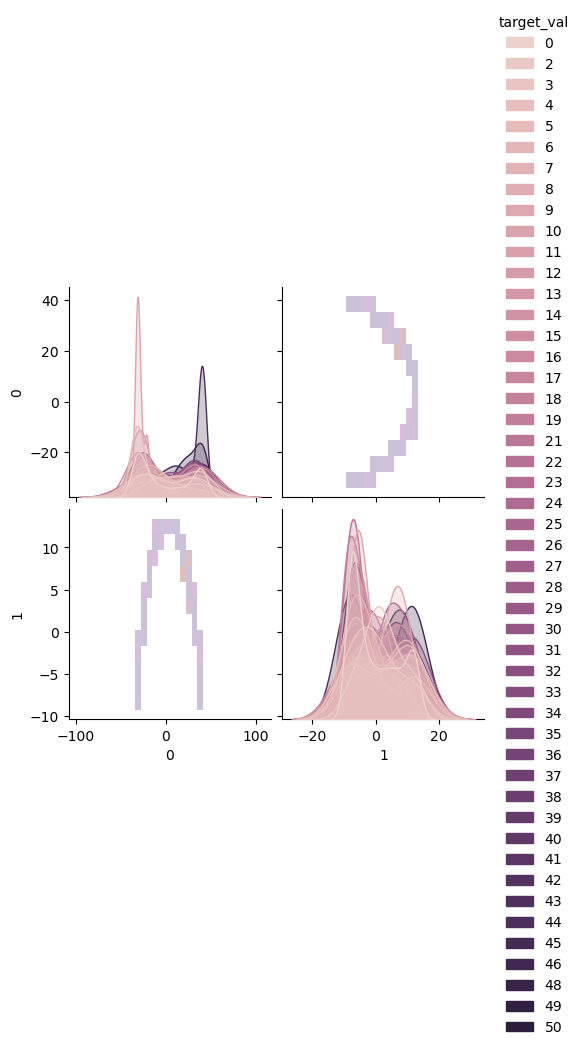

In [45]:
import seaborn as sns
_plt_df = _pca_df.join(all_y_s)
plt_kws = dict( hue='target_val', diag_kws=dict(common_norm=False), kind='hist',
             diag_kind='kde',)
sns.pairplot(_plt_df, **plt_kws)
#sns.pairplot(_plt_df.groupby(all_y_s.name).sample(3000), **plt_kws)

#sns.pairplot(_plt_df, hue='is_speaking', diag_kws=dict(common_norm=True), kind='hist',
#             diag_kind='kde',)


In [ ]:
# NxN correlation - need parallel frameworkt to be reasonable
#all_x_corr = all_x_df.corr()

inspect context output features

In [46]:
pp_cols = np.random.choice(all_x_df.columns, 5, replace=False)
pp_df = all_x_df[pp_cols].join(all_y_s)

In [47]:
sns.pairplot(pp_df.groupby(all_y_s.name).sample(4000), hue='is_speaking', kind='hist',
             diag_kind='kde', diag_kws=dict(common_norm=False),
             plot_kws=dict( binwidth=0.1)
            )

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
%%time
sns.pairplot(pp_df.sample(10000), hue='is_speaking', kind='kde', diag_kws=dict(common_norm=False), plot_kws=dict(alpha=0.7))